![image](https://github.com/IBM/watson-machine-learning-samples/raw/master/cloud/notebooks/headers/AutoAI-Banner_Experiment-Notebook.png)
<div align="center">
    <h1>Our journey of learning AutoAI</h1>
    <h2 style="margin-top: 3px;">Python and other technologies</h2>
</div>

<div align="right">
   by Julka & Szymon
</div>

## Welcome in our final Internship product - Jupyter notebook.

<div align="center">
    <h2>About our project</h2>
</div>

We are dealing with AI for the first time. When we saw Watson Studio and AutoAI experiment we were overwhelmed and we didn't know we could manage it.

**Our task was to improve machine learning algorithm that can predict loan issuance risk.**

<div align="center">
    <h2>First steps</h2>
</div>

#### In the first week our Internship we've been learning some knowledge about ai.

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/5572e8_1_christie_ai_hso-com.jpg?raw=true)

AI is a set of self improving algorithms. We feed our models with data and we watch magic happen. 
AI is used in medicine, healthcare, self-driving cars, robots, assistants etc.

We had to learn Watson Studio. To start we needed to add a couple services to our project like data space, Watson Studio etc.

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/services.JPG?raw=true)


We created project in IBM DataCloud and started to get to know AutoAI.

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/projects.JPG?raw=true)

Next, we added dataset to project assets and AutoAI experiment.

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/project.JPG?raw=true)

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/relationship_map.JPG?raw=true)

<div align="center">
    AutoAI relationship map.
</div>

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/progress.JPG?raw=true)

<div align="center">
    AutoAI model progress map.
</div>

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/pipelines.JPG?raw=true)

<div align="center">
    AutoAI generated pipelines.
</div>

<div align="center">
    <h2>Next steps</h2>
</div>

After a bit of AI learning, we saved the best pipeline as a Jupyter Notebook.

![image](https://github.com/IBM/watson-machine-learning-samples/raw/master/cloud/notebooks/headers/AutoAI-Banner_Pipeline-Notebook.png)
# Notebook for Internship - AutoAI Notebook v1.15.0

Consider these tips for working with an auto-generated notebook:
- Notebook code generated using AutoAI will execute successfully. If you modify the notebook, we cannot guarantee it will run successfully.
- This pipeline is optimized for the original data set. The pipeline might fail or produce sub-optimum results if used with different data.  If you want to use a different data set, consider retraining the AutoAI experiment to generate a new pipeline. For more information, see <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/autoai-notebook.html">Cloud Platform</a> 
- Before modifying the pipeline or trying to re-fit the pipeline, consider that the code converts dataframes to numpy arrays before fitting the pipeline (a current restriction of the preprocessor pipeline).


<a id="content"></a>
## Notebook content

This notebook contains a Scikit-learn representation of AutoAI pipeline. This notebook introduces commands for getting data, training the model, and testing the model. 

Some familiarity with Python is helpful. This notebook uses Python 3.7 and scikit-learn 0.23.2.

## Notebook goals

-  Scikit-learn pipeline definition
-  Pipeline training 
-  Pipeline evaluation

## Contents

This notebook contains the following parts:

**[Setup](#setup)**<br>
&nbsp;&nbsp;[Package installation](#install)<br>
&nbsp;&nbsp;[AutoAI experiment metadata](#variables_definition)<br>
**[Pipeline inspection](#inspection)** <br>
&nbsp;&nbsp;[Read training data](#read)<br>
&nbsp;&nbsp;[Train and test data split](#split)<br>
&nbsp;&nbsp;[Make pipeline](#preview_model_to_python_code)<br>
&nbsp;&nbsp;[Train pipeline model](#train)<br>
&nbsp;&nbsp;[Test pipeline model](#test_model)<br>
**[Next steps](#next_steps)**<br>
**[Copyrights](#copyrights)**

<a id="setup"></a>
# Setup

<a id="install"></a>
## Package installation
Before you use the sample code in this notebook, install the following packages:
 - ibm_watson_machine_learning,
 - autoai-libs,
 - scikit-learn,
 - xgboost.


In [ ]:
!pip install ibm-watson-machine-learning
!pip install -U autoai-libs==1.12.6
!pip install -U scikit-learn==0.23.2
!pip install -U xgboost==1.3.3
!pip install -U plotly

<a id="variables_definition"></a>
## AutoAI experiment metadata
The following cell contains the training data connection details.  
**Note**: The connection might contain authorization credentials, so be careful when sharing the notebook.

In [129]:
#@hidden_cell
from ibm_watson_machine_learning.helpers import DataConnection
from ibm_watson_machine_learning.helpers import S3Connection, S3Location

training_data_reference = [DataConnection(
    connection=S3Connection(
        api_key='PZeV9yeiXNsxL0cIhsuERsaqjUwryg4m_UkT0ZbHttXw',
        auth_endpoint='https://iam.bluemix.net/oidc/token/',
        endpoint_url='https://s3-api.us-geo.objectstorage.softlayer.net'
    ),
        location=S3Location(
        bucket='internshiptest-donotdelete-pr-lbx9gwuhgc1cis',
        path='credit_risk_training.csv'
    )),
]
training_result_reference = DataConnection(
    connection=S3Connection(
        api_key='PZeV9yeiXNsxL0cIhsuERsaqjUwryg4m_UkT0ZbHttXw',
        auth_endpoint='https://iam.bluemix.net/oidc/token/',
        endpoint_url='https://s3-api.us-geo.objectstorage.softlayer.net'
    ),
    location=S3Location(
        bucket='internshiptest-donotdelete-pr-lbx9gwuhgc1cis',
        path='auto_ml/2d1ad8db-0082-4482-afb3-513c7992d64d/wml_data/2493a106-a7b0-4878-9b3d-db5924f77c74/data/automl',
        model_location='auto_ml/2d1ad8db-0082-4482-afb3-513c7992d64d/wml_data/2493a106-a7b0-4878-9b3d-db5924f77c74/data/automl/hpo_c_output/Pipeline1/model.pickle',
        training_status='auto_ml/2d1ad8db-0082-4482-afb3-513c7992d64d/wml_data/2493a106-a7b0-4878-9b3d-db5924f77c74/training-status.json'
    ))

Following cell contains input parameters provided to run the AutoAI experiment in Watson Studio.

In [130]:
experiment_metadata = dict(
   prediction_type='classification',
   prediction_column='Risk',
   holdout_size=0.1,
   scoring='accuracy',
   deployment_url='https://us-south.ml.cloud.ibm.com',
   csv_separator=',',
   random_state=33,
   max_number_of_estimators=2,
   training_data_reference=training_data_reference,
   training_result_reference=training_result_reference,
   project_id='1560bdad-b82c-4f14-b062-016783069295',
   positive_label='No Risk',
   drop_duplicates=True
)

<a id="inspection"></a>
# Pipeline inspection

<a id="read"></a>
## Read training data

Retrieve training dataset from AutoAI experiment as pandas DataFrame.

In [131]:
df = training_data_reference[0].read(csv_separator=experiment_metadata['csv_separator'])
df.dropna('rows', how='any', subset=[experiment_metadata['prediction_column']], inplace=True)

<a id="split"></a>
##  Train and test data split

In [132]:
from sklearn.model_selection import train_test_split

df.drop_duplicates(inplace=True)
X = df.drop([experiment_metadata['prediction_column']], axis=1).values
y = df[experiment_metadata['prediction_column']].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=experiment_metadata['holdout_size'],
                                                    stratify=y, random_state=experiment_metadata['random_state'])

<a id="preview_model_to_python_code"></a>
## Make pipeline
In the next cell, you can find the Scikit-learn definition of the selected AutoAI pipeline.

Import statements.

In [133]:
from autoai_libs.transformers.exportable import NumpyColumnSelector
from autoai_libs.transformers.exportable import CompressStrings
from autoai_libs.transformers.exportable import NumpyReplaceMissingValues
from autoai_libs.transformers.exportable import NumpyReplaceUnknownValues
from autoai_libs.transformers.exportable import boolean2float
from autoai_libs.transformers.exportable import CatImputer
from autoai_libs.transformers.exportable import CatEncoder
import numpy as np
from autoai_libs.transformers.exportable import float32_transform
from sklearn.pipeline import make_pipeline
from autoai_libs.transformers.exportable import FloatStr2Float
from autoai_libs.transformers.exportable import NumImputer
from autoai_libs.transformers.exportable import OptStandardScaler
from sklearn.pipeline import make_union
from autoai_libs.transformers.exportable import NumpyPermuteArray
from autoai_libs.cognito.transforms.transform_utils import TA2
import autoai_libs.utils.fc_methods
from autoai_libs.cognito.transforms.transform_utils import FS1
from autoai_libs.cognito.transforms.transform_utils import TAM
from sklearn.cluster import FeatureAgglomeration
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

#### Pre-processing & Estimator.

In [134]:
numpy_column_selector_0 = NumpyColumnSelector(
    columns=[
        0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
    ]
)
compress_strings = CompressStrings(
    compress_type="hash",
    dtypes_list=[
        "char_str", "int_num", "char_str", "char_str", "char_str", "char_str",
        "int_num", "char_str", "char_str", "int_num", "char_str", "int_num",
        "char_str", "char_str", "int_num", "char_str", "int_num", "char_str",
        "char_str",
    ],
    missing_values_reference_list=["", "-", "?", float("nan")],
    misslist_list=[
        [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],
        [], [],
    ],
)
numpy_replace_missing_values_0 = NumpyReplaceMissingValues(
    missing_values=[], filling_values=float("nan")
)
numpy_replace_unknown_values = NumpyReplaceUnknownValues(
    filling_values=float("nan"),
    filling_values_list=[
        float("nan"), float("nan"), float("nan"), float("nan"), float("nan"),
        float("nan"), float("nan"), float("nan"), float("nan"), float("nan"),
        float("nan"), float("nan"), float("nan"), float("nan"), float("nan"),
        float("nan"), float("nan"), float("nan"), float("nan"),
    ],
    missing_values_reference_list=["", "-", "?", float("nan")],
)

In [135]:
cat_imputer = CatImputer(
    strategy="most_frequent",
    missing_values=float("nan"),
    sklearn_version_family="23",
)
cat_encoder = CatEncoder(
    encoding="ordinal",
    categories="auto",
    dtype=np.float64,
    handle_unknown="error",
    sklearn_version_family="23",
)
pipeline_0 = make_pipeline(
    numpy_column_selector_0,
    compress_strings,
    numpy_replace_missing_values_0,
    numpy_replace_unknown_values,
    boolean2float(),
    cat_imputer,
    cat_encoder,
    float32_transform(),
)
numpy_column_selector_1 = NumpyColumnSelector(columns=[4])
float_str2_float = FloatStr2Float(
    dtypes_list=["int_num"], missing_values_reference_list=[]
)

In [136]:
numpy_replace_missing_values_1 = NumpyReplaceMissingValues(
    missing_values=[], filling_values=float("nan")
)
num_imputer = NumImputer(strategy="median", missing_values=float("nan"))
opt_standard_scaler = OptStandardScaler(
    num_scaler_copy=None,
    num_scaler_with_mean=None,
    num_scaler_with_std=None,
    use_scaler_flag=False,
)
pipeline_1 = make_pipeline(
    numpy_column_selector_1,
    float_str2_float,
    numpy_replace_missing_values_1,
    num_imputer,
    opt_standard_scaler,
    float32_transform(),
)
union = make_union(pipeline_0, pipeline_1)
numpy_permute_array = NumpyPermuteArray(
    axis=0,
    permutation_indices=[
        0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 4,
    ],
)

In [137]:
ta2 = TA2(
    fun=np.multiply,
    name="product",
    datatypes1=[
        "intc", "intp", "int_", "uint8", "uint16", "uint32", "uint64", "int8",
        "int16", "int32", "int64", "short", "long", "longlong", "float16",
        "float32", "float64",
    ],
    feat_constraints1=[autoai_libs.utils.fc_methods.is_not_categorical],
    datatypes2=[
        "intc", "intp", "int_", "uint8", "uint16", "uint32", "uint64", "int8",
        "int16", "int32", "int64", "short", "long", "longlong", "float16",
        "float32", "float64",
    ],
    feat_constraints2=[autoai_libs.utils.fc_methods.is_not_categorical],
    col_names=[
        "CheckingStatus", "LoanDuration", "CreditHistory", "LoanPurpose",
        "LoanAmount", "ExistingSavings", "EmploymentDuration",
        "InstallmentPercent", "Sex", "OthersOnLoan",
        "CurrentResidenceDuration", "OwnsProperty", "Age", "InstallmentPlans",
        "Housing", "ExistingCreditsCount", "Job", "Dependents", "Telephone",
        "ForeignWorker",
    ],
    col_dtypes=[
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"),
    ],
)
fs1_0 = FS1(
    cols_ids_must_keep=range(0, 20),
    additional_col_count_to_keep=20,
    ptype="classification",
)

In [138]:
tam = TAM(
    tans_class=FeatureAgglomeration(),
    name="featureagglomeration",
    col_names=[
        "CheckingStatus", "LoanDuration", "CreditHistory", "LoanPurpose",
        "LoanAmount", "ExistingSavings", "EmploymentDuration",
        "InstallmentPercent", "Sex", "OthersOnLoan",
        "CurrentResidenceDuration", "OwnsProperty", "Age", "InstallmentPlans",
        "Housing", "ExistingCreditsCount", "Job", "Dependents", "Telephone",
        "ForeignWorker", "product(LoanDuration__LoanAmount)",
        "product(LoanDuration__Age)", "product(LoanAmount__Age)",
    ],
    col_dtypes=[
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"),
    ],
)
fs1_1 = FS1(
    cols_ids_must_keep=range(0, 20),
    additional_col_count_to_keep=20,
    ptype="classification",
)

In [139]:
xgb_classifier = XGBClassifier(
    base_score=0.5,
    booster="gbtree",
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    gamma=0,
    gpu_id=-1,
    interaction_constraints="",
    learning_rate=1.0,
    max_delta_step=0,
    max_depth=1,
    min_child_weight=2,
    monotone_constraints="()",
    n_estimators=73,
    n_jobs=2,
    num_parallel_tree=1,
    random_state=33,
    reg_alpha=1,
    reg_lambda=1.0,
    scale_pos_weight=1,
    subsample=0.9999999469734357,
    tree_method="hist",
    validate_parameters=1,
    verbosity=0,
    nthread=2,
    silent=True,
    seed=33,
)

Pipeline.

In [140]:
pipeline = make_pipeline(
    union, numpy_permute_array, ta2, fs1_0, tam, fs1_1, xgb_classifier
)

<a id="train"></a>
## Train pipeline model


### Define scorer from the optimization metric
This cell constructs the cell scorer based on the experiment metadata.

In [141]:
from sklearn.metrics import get_scorer

scorer = get_scorer(experiment_metadata['scoring'])

<a id="test_model"></a>
### Fit pipeline model
In this cell, the pipeline is fitted.

In [ ]:
pipeline.fit(train_X,train_y)

<a id="test_model"></a>
## Test pipeline model

Score the fitted pipeline with the generated scorer using the holdout dataset.

In [143]:
score = scorer(pipeline, test_X, test_y)
print(score)

0.7735470941883767


<div align="center">
    <h2>First improvements</h2>
</div>

1. Confusion matrix for first model
2. GridSearch
3. Feature Selector

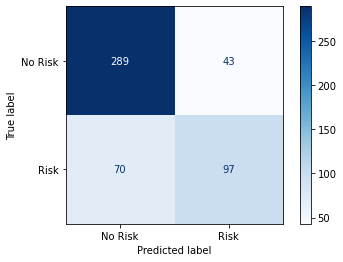

Percentage of correctly predicted Risk label: 58.08383233532935
Percentage of correctly predicted No Risk label: 87.04819277108435


In [144]:
#imports for creating confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(pipeline, test_X, test_y, cmap=plt.cm.Blues)
plt.show()

cm = confusion_matrix(test_y, pipeline.predict(test_X), labels = ['No Risk', 'Risk'])
print("Percentage of correctly predicted Risk label:", (cm[1][1] / (cm[1][0] + cm[1][1])) * 100)
print("Percentage of correctly predicted No Risk label:", (cm[0][0] / (cm[0][0] + cm[0][1])) * 100)

In [65]:
#import for Pipeline constructor
from sklearn.pipeline import Pipeline

#import for feature seleciton
from sklearn.feature_selection import SelectFromModel

#import for GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__max_depth': [1, 2, 3, 4, 5, 7, 10],
    'model__learning_rate': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
    'model__n_estimators': [40, 50, 60, 70],
    'model__min_child_weight': [1, 5, 7, 10],
    'model__gamma': [0, 1, 2, 3],
    'model__subsample': [0.4, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]  
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=1, scoring='accuracy')
grid.fit(train_X, train_y)
print(f"Best parameters: {grid.best_params_}")

Redefining hyperparameters received from the GridSearch function in the XGB model.

In [145]:
xgb_classifier = XGBClassifier(
    base_score=0.5,
    booster="gbtree",
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1.0,
    gamma=0,
    gpu_id=-1,
    interaction_constraints="",
    learning_rate=1.0,
    max_delta_step=0,
    max_depth=1,
    min_child_weight=1,
    monotone_constraints="()",
    n_estimators=50,
    n_jobs=2,
    num_parallel_tree=1,
    random_state=33,
    reg_alpha=1,
    reg_lambda=1.0,
    scale_pos_weight=1,
    subsample=0.8,
    tree_method="hist",
    validate_parameters=1,
    verbosity=0,
    nthread=2,
    silent=True,
    seed=33,
)

In [ ]:
second_pipeline = Pipeline([
    ('union', union), 
    ('numpy_permute_array', numpy_permute_array), 
    ('ta2', ta2),
    ('fs1_0', fs1_0),
    ('tam', tam),
    ('fs1_1', fs1_1),
    ('model', xgb_classifier),
])
second_pipeline.fit(train_X,train_y)

Score and confusion matrix after hyperparameter optimatization.

0.779559118236473


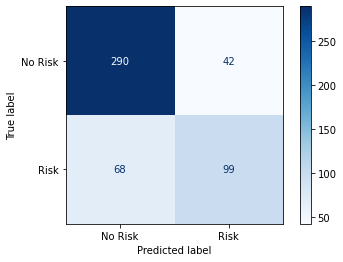

Percentage of correctly predicted Risk label: 59.2814371257485
Percentage of correctly predicted No Risk label: 87.34939759036145


In [153]:
second_score = scorer(second_pipeline, test_X, test_y)
print(second_score)

plot_confusion_matrix(second_pipeline, test_X, test_y, cmap=plt.cm.Blues)
plt.show()

cm = confusion_matrix(test_y, second_pipeline.predict(test_X), labels = ['No Risk', 'Risk'])
print("Percentage of correctly predicted Risk label:", (cm[1][1] / (cm[1][0] + cm[1][1])) * 100)
print("Percentage of correctly predicted No Risk label:", (cm[0][0] / (cm[0][0] + cm[0][1])) * 100)

Feature selector.

In [ ]:
selection = SelectFromModel(xgb_classifier)
third_pipeline = Pipeline([
    ('union', union), 
    ('numpy_permute_array', numpy_permute_array), 
    ('ta2', ta2),
    ('fs1_0', fs1_0),
    ('tam', tam),
    ('fs1_1', fs1_1),
    ('selection', selection),
    ('model', xgb_classifier),
])
third_pipeline.fit(train_X,train_y)

Score and confusion matrix after hyperparameter optimatization and feature selection.

0.7915831663326653


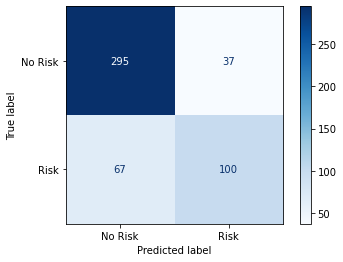

Percentage of correctly predicted Risk label: 59.88023952095808
Percentage of correctly predicted No Risk label: 88.85542168674698


In [155]:
third_score = scorer(third_pipeline, test_X, test_y)
print(third_score)

plot_confusion_matrix(third_pipeline, test_X, test_y, cmap=plt.cm.Blues)
plt.show()

cm = confusion_matrix(test_y, third_pipeline.predict(test_X), labels = ['No Risk', 'Risk'])
print("Percentage of correctly predicted Risk label:", (cm[1][1] / (cm[1][0] + cm[1][1])) * 100)
print("Percentage of correctly predicted No Risk label:", (cm[0][0] / (cm[0][0] + cm[0][1])) * 100)

Score comparison.

In [ ]:
#import plotly objects
import plotly.graph_objects as go

chart = go.Figure([go.Bar(x = ['First score', 'Second score', 'Third score'], 
                          y=[score, second_score, third_score])])

chart.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=10
)

chart.show()

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/chart1.JPG?raw=true)

<div align="center">
    <h2>Next steps</h2>
    <h3 style="margin-top: 1px;">Metrics and risk calculation</h3>
</div>

1. Why we are using the metrics?
2. What are the metrics?
3. Three metrics: f1 score, precision score and recall score
4. Troubleshooting for the calculation crashings
4. Why the metric didn't work for us

In [72]:
#imports for scorers
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

<img src="https://github.com/halskiszymon/IBM-Internship/blob/main/img/pr1e.png?raw=true" style="width:600px;"/>

<img src="https://github.com/halskiszymon/IBM-Internship/blob/main/img/pr2.png?raw=true" style="width:600px;"/>

## Define scoring method
Choose scoring strategy.

In [73]:
#Values: accuracy_score, f1_score, precision_score, recall_score
#Default: accuracy_score
scoring_method = f1_score   

In [91]:
def print_score(method, model = pipeline):
    return {
        accuracy_score: accuracy_score(test_y, model.predict(test_X)),
        f1_score: f1_score(test_y, model.predict(test_X), average='micro', labels=['Risk']),
        precision_score: precision_score(test_y, model.predict(test_X), average='micro', labels=['Risk']),
        recall_score: recall_score(test_y, model.predict(test_X), average='micro', labels=['Risk']),
    }[method]

In [92]:
#f1 score
scoring_method = f1_score
score = print_score(scoring_method, third_pipeline)
print(score)

0.6578947368421053


In [94]:
#precision score
scoring_method = precision_score
second_score = print_score(scoring_method, third_pipeline)
print(second_score)

0.7299270072992701


In [95]:
#recall score
scoring_method = recall_score
third_score = print_score(scoring_method, third_pipeline)
print(third_score)

0.5988023952095808


### GridSearch for each metric


In [78]:
param_grid = {
    'model__max_depth': [1, 2, 3, 4, 5, 7, 10],
    'model__learning_rate': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
    'model__n_estimators': [40, 50, 60, 70],
    'model__min_child_weight': [1, 5, 7, 10],
    'model__gamma': [0, 1, 2, 3],
    'model__subsample': [0.4, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]  
}

grid = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=5, 
      scoring=make_scorer(scoring_method, average='micro', pos_label='Risk', labels=['Risk']))

grid.fit(train_X, train_y)
print(f"Best parameters: {grid.best_params_}")

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/notebooks.JPG?raw=true)
<div align="center">
    Notebooks.
</div>

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/Anaconda_Logo.png?raw=true)

<div align="center">
    Anaconda logo.
</div>

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/anaconda_prompt.JPG?raw=true)
<div align="center">
    Anaconda prompt.
</div>

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/conda_newenv.JPG?raw=true)
<div align="center">
    New Anaconda enviroment.
</div>

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/conda_env37.JPG?raw=true)
<div align="center">
    Activate enviroment.
</div>

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/jupyter_notebook_server.JPG?raw=true)
<div align="center">
    Jupyter notebook server.
</div>

### Calculation crashes
TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


**First solution:** Run notebook as python script.

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/conda_run_script.JPG?raw=true)
<div align="center">
    (no worries about warnings)
</div>

**Second solution:** Modify gridserach function and make checkpoints.

In [79]:
grid = GridSearchCV(pipeline, param_grid, n_jobs=1, verbose=10, cv=5, 
        scoring=make_scorer(scoring_method, average='micro', pos_label='Risk', labels=['Risk']))

grid.fit(train_X, train_y)
print(f"Best parameters: {grid.best_params_}")

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/txt%20file.JPG?raw=true)
<div align="center">
    .txt file.
</div>

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/fetch_script.JPG?raw=true)
<div align="center">
    Python script to fetch best score from txt file.
</div>

Final results:

#### f1 score
```
Best parameters: {'model__colsample_bytree': 0.8, 'model__gamma': 2, 'model__learning_rate': 1.0, 'model__max_depth': 1, 'model__min_child_weight': 1, 'model__n_estimators': 40, 'model__subsample': 1.0}
```

#### precision score
```
Best parameters: {'model__colsample_bytree': 1.0, 'model__gamma': 3, 'model__learning_rate': 2.0, 'model__max_depth': 10, 'model__min_child_weight': 5, 'model__n_estimators': 60, 'model__subsample': 1.0}
```

#### recall score
```
Best parameters: {'model__colsample_bytree': 0.6, 'model__gamma': 2, 'model__learning_rate': 2.0, 'model__max_depth': 2, 'model__min_child_weight': 1, 'model__n_estimators': 40, 'model__subsample': 0.8}
```

After updating them in model our scores...

In [96]:
scoring_method = f1_score

xgb_classifier = XGBClassifier(
    base_score=0.5,
    booster="gbtree",
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=0.8,
    gamma=2,
    gpu_id=-1,
    interaction_constraints="",
    learning_rate=1.0,
    max_delta_step=0,
    max_depth=1,
    min_child_weight=1,
    monotone_constraints="()",
    n_estimators=40,
    n_jobs=2,
    num_parallel_tree=1,
    random_state=33,
    reg_alpha=1,
    reg_lambda=1.0,
    scale_pos_weight=1,
    subsample=1.0,
    tree_method="hist",
    validate_parameters=1,
    verbosity=0,
    nthread=2,
    silent=True,
    seed=33,
)

In [97]:
#f1 score
selection = SelectFromModel(xgb_classifier)
fourth_pipeline = Pipeline([
    ('union', union), 
    ('numpy_permute_array', numpy_permute_array), 
    ('ta2', ta2),
    ('fs1_0', fs1_0),
    ('tam', tam),
    ('fs1_1', fs1_1),
    ('selection', selection),
    ('model', xgb_classifier),
])
fourth_pipeline.fit(train_X,train_y)
fourth_score = print_score(scoring_method, fourth_pipeline)

In [98]:
scoring_method = precision_score

xgb_classifier = XGBClassifier(
    base_score=0.5,
    booster="gbtree",
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1.0,
    gamma=3,
    gpu_id=-1,
    interaction_constraints="",
    learning_rate=2.0,
    max_delta_step=0,
    max_depth=10,
    min_child_weight=5,
    monotone_constraints="()",
    n_estimators=60,
    n_jobs=2,
    num_parallel_tree=1,
    random_state=33,
    reg_alpha=1,
    reg_lambda=1.0,
    scale_pos_weight=1,
    subsample=1.0,
    tree_method="hist",
    validate_parameters=1,
    verbosity=0,
    nthread=2,
    silent=True,
    seed=33,
)

In [99]:
#precision score
selection = SelectFromModel(xgb_classifier)
fifth_pipeline = Pipeline([
    ('union', union), 
    ('numpy_permute_array', numpy_permute_array), 
    ('ta2', ta2),
    ('fs1_0', fs1_0),
    ('tam', tam),
    ('fs1_1', fs1_1),
    ('selection', selection),
    ('model', xgb_classifier),
])
fifth_pipeline.fit(train_X,train_y)
fifth_score = print_score(scoring_method, fifth_pipeline)

In [100]:
scoring_method = recall_score

xgb_classifier = XGBClassifier(
    base_score=0.5,
    booster="gbtree",
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=0.6,
    gamma=2,
    gpu_id=-1,
    interaction_constraints="",
    learning_rate=2.0,
    max_delta_step=0,
    max_depth=2,
    min_child_weight=1,
    monotone_constraints="()",
    n_estimators=40,
    n_jobs=2,
    num_parallel_tree=1,
    random_state=33,
    reg_alpha=1,
    reg_lambda=1.0,
    scale_pos_weight=1,
    subsample=0.8,
    tree_method="hist",
    validate_parameters=1,
    verbosity=0,
    nthread=2,
    silent=True,
    seed=33,
)

In [101]:
#precision score
selection = SelectFromModel(xgb_classifier)
sixth_pipeline = Pipeline([
    ('union', union), 
    ('numpy_permute_array', numpy_permute_array), 
    ('ta2', ta2),
    ('fs1_0', fs1_0),
    ('tam', tam),
    ('fs1_1', fs1_1),
    ('selection', selection),
    ('model', xgb_classifier),
])
sixth_pipeline.fit(train_X,train_y)
sixth_score = print_score(scoring_method, sixth_pipeline)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Default score', x=['f1 score', 'precision score', 'recall score'], 
           y=[score, second_score, third_score]),
    go.Bar(name='Score after optimatization', x=['f1 score', 'precision score', 'recall score'], 
           y=[fourth_score, fifth_score, sixth_score])
])

fig.update_layout(barmode='group')
fig.show()

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/chart2.JPG?raw=true)

f1 score after "optimatization"


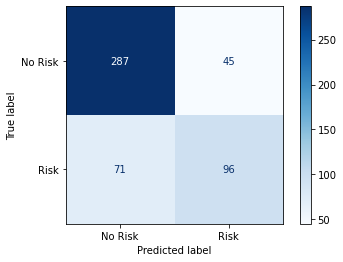

In [111]:
print('f1 score after "optimatization"')
plot_confusion_matrix(fourth_pipeline, test_X, test_y, cmap=plt.cm.Blues)
plt.show()

precision score after "optimatization"


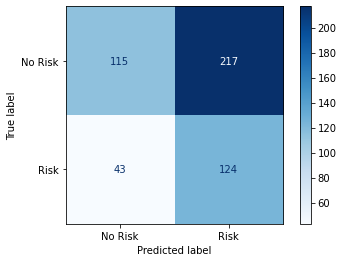

In [110]:
print('precision score after "optimatization"')
plot_confusion_matrix(fifth_pipeline, test_X, test_y, cmap=plt.cm.Blues)
plt.show()

recall score after "optimatization"


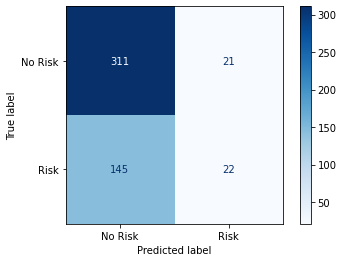

In [109]:
print('recall score after "optimatization"')
plot_confusion_matrix(sixth_pipeline, test_X, test_y, cmap=plt.cm.Blues)
plt.show()

<div align="center">
    <h1>We did it.</h1>
    <h2>by 2%.</h2>
</div>

## Conclusion
### Skills we learned
1. A lot of Python knowledge
2. IBM Cloud structure
3. IBM Watson Studio
4. How machine learning works
5. Random Forest, LGBM and XGB classifiers
6. Scikit-learn package
7. Data preprocessing for machine learning
8. Scoring metrics
9. Troubleshooting
10. Data visualization
11. Plotly package
12. Anaconda software
13. Jupyter Notebooks & Server
14. Running python localy

![image](https://github.com/halskiszymon/IBM-Internship/blob/main/img/ending.jpg?raw=true)
<div align="center">
    This is not the end of our journey. Thank you from the mountains.
</div>